In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import sklearn as skt
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
import re

In [2]:

data=pd.read_csv("train.csv")
data.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000):
         with pd.option_context("display.max_columns", 1000):
            display(df)

In [4]:
(data['id']).count()

159571

In [5]:
data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
data['comment_text'][2]

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

In [8]:
data[(data['toxic']==1) & (data['obscene']==1) ]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...
159411,fd2f53aafe8eefcc,Fat piece of shit \n\nyou obese piece of shit....,1,0,1,0,1,0
159493,fef142420a215b90,FUCKING FAGGOT \n\nLOLWAT.,1,0,1,0,1,0
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0


In [9]:
data.iloc[6,:]

id                                           0002bcb3da6cb337
comment_text     COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
toxic                                                       1
severe_toxic                                                1
obscene                                                     1
threat                                                      0
insult                                                      1
identity_hate                                               0
Name: 6, dtype: object

In [10]:
data.iloc[43,:]

id                                       00190820581d90ce
comment_text     FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!
toxic                                                   1
severe_toxic                                            0
obscene                                                 1
threat                                                  0
insult                                                  1
identity_hate                                           0
Name: 43, dtype: object

### EDA and Data Cleaning

In [11]:
#data['comment_text'] = data['comment_text'].str.lower()

In [12]:
data.head(3)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0


### Removing punctuation

In [13]:
import string 
PUNCT_TO_REMOVE = string.punctuation

In [14]:
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [15]:
data["comment_text"] = data["comment_text"].apply(lambda text: remove_punctuation(text))

In [16]:
data.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,Daww He matches this background colour Im seem...,0,0,0,0,0,0
2,000113f07ec002fd,Hey man Im really not trying to edit war Its j...,0,0,0,0,0,0
3,0001b41b1c6bb37e,\nMore\nI cant make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,You sir are my hero Any chance you remember wh...,0,0,0,0,0,0


In [18]:
data.iloc[0,2:]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 0, dtype: object

#### Types of toxicity and relative proportions

In [19]:
data.columns.values

array(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'], dtype=object)

/home/rajarshi/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

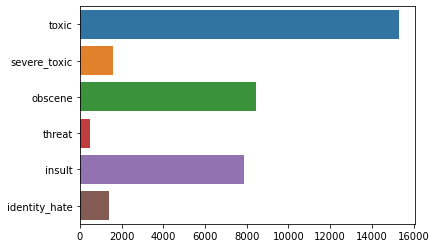

In [20]:
categories = list(data.iloc[:,2:].columns.values)
sns.barplot(data.iloc[:,2:].sum().values,categories,orient='h')

In [21]:
number_of_samples=data.iloc[:,0].count()

In [22]:
y=data.iloc[:,2:].sum(axis=1).value_counts()/data.iloc[:,0].count()*100

<AxesSubplot:>

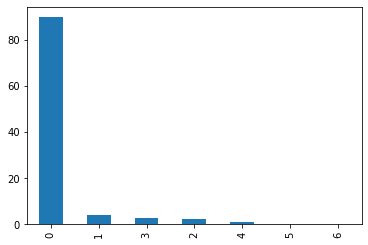

In [23]:
y.plot.bar()

In [24]:
data.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,Daww He matches this background colour Im seem...,0,0,0,0,0,0
2,000113f07ec002fd,Hey man Im really not trying to edit war Its j...,0,0,0,0,0,0
3,0001b41b1c6bb37e,\nMore\nI cant make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,You sir are my hero Any chance you remember wh...,0,0,0,0,0,0


### Prepare data function for data cleaning

In [28]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
def prepare_data(input_text):
    """
    Inputs: input_text: string 
    Returns: clean_document : string 
    """
    def replace_newline(string):
        return re.sub(r"\n"," ",text)

        lemma = wn.morphy(word)
        if lemma is None:
            return word
        else:
            return lemma
    

    tokens = word_tokenize(input_text)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word.lower() for word in tokens]
    
    en_stop = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in en_stop]
    tokens = [get_lemma(word) for word in tokens]
    tokens= [WordNetLemmatizer().lemmatize(word) for word in tokens]
    clean_doc = ''
    for i in range(len(tokens)):
        clean_doc += ' ' + tokens[i] 
    return clean_doc

In [29]:
data['comment_text']=data['comment_text'].apply(prepare_data)

In [30]:
data.head(4)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edit make username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww match background colour im seemingly sti...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really try edit war guy constantly...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggestion improvement wonder ...,0,0,0,0,0,0


In [31]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional
from sklearn.model_selection import train_test_split

### Performing train test split

In [32]:
train_split_fraction=0.8
split_index=int(number_of_samples*train_split_fraction)
data=data.sample(frac=1)
X_train,ytrain=data.iloc[:split_index,1], data.iloc[:split_index,2:]
X_test,ytest=data.iloc[split_index:,1], data.iloc[split_index:,2:]

In [33]:
split_index

127656

In [34]:
data.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
90656,f28f81507ebee4e9,hey please look give opinion,0,0,0,0,0,0
81992,db599e6e205eeefb,good article though lack balance kudos author...,0,0,0,0,0,0
115,004b97c80705a548,also think vegetable basket need wikipedia page,0,0,0,0,0,0
64824,ad793348a9d78514,know intention excuse nature offensive langua...,0,0,0,0,0,0
140274,ee8d964d0646f187,able define,0,0,0,0,0,0


In [35]:
ytrain.head(3)

,toxic,severe_toxic,obscene,threat,insult,identity_hate
90656,0,0,0,0,0,0
81992,0,0,0,0,0,0
115,0,0,0,0,0,0


#### Defining constants for padding, size of vocabulary

In [36]:
vocab_size = 10000
oov_token = "<OOV>"
max_length = 300
padding_type = "post"
trunction_type="post"

In [37]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

In [38]:
word_index = tokenizer.word_index

In [40]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)

In [42]:
X_train_padded = pad_sequences(X_train_sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunction_type)

In [43]:
X_train_padded

array([[ 317,    8,   51, ...,    0,    0,    0],
       [  38,    2,  162, ...,    0,    0,    0],
       [  19,   18, 8125, ...,    0,    0,    0],
       ...,
       [ 332,  437, 2231, ...,    0,    0,    0],
       [1605,    1,   76, ...,    0,    0,    0],
       [  21,  473,  604, ...,    0,    0,    0]], dtype=int32)

In [44]:
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunction_type)

### Using Glove  Embedding 

In [45]:
embeddings_index = {}
f = open('glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [46]:
embedding_matrix = np.zeros((len(word_index) + 1, max_length))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

### Defining Embedding layer

In [47]:
embedding_layer = Embedding(len(word_index) + 1,
                            max_length,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)

In [48]:
model = Sequential()

In [49]:
model.add(embedding_layer)

In [50]:
model.add(Bidirectional(LSTM(units = 100, dropout = 0.2, recurrent_dropout = 0.2)))

In [51]:
#model.add(LSTM(units = 100, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(units = 6, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          50801400  
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               320800    
_________________________________________________________________
dense (Dense)                (None, 6)                 1206      
Total params: 51,123,406
Trainable params: 322,006
Non-trainable params: 50,801,400
_________________________________________________________________


#### Training the model using binary_crossentropy as the loss function as it is multi-label classification problem. Using AUC as metric and Adam optimizer.

In [52]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["AUC"])
history=model.fit(X_train_padded, ytrain, batch_size = 128, epochs = 5, validation_data=(X_test_padded, ytest))

Epoch 1/5
998/998 [==============================] - 1970s 2s/step - loss: 0.1069 - auc: 0.9039 - val_loss: 0.0543 - val_auc: 0.9790
Epoch 2/5
998/998 [==============================] - 1827s 2s/step - loss: 0.0544 - auc: 0.9754 - val_loss: 0.0502 - val_auc: 0.9817
Epoch 3/5
998/998 [==============================] - 1499s 2s/step - loss: 0.0496 - auc: 0.9802 - val_loss: 0.0479 - val_auc: 0.9813
Epoch 4/5
998/998 [==============================] - 1454s 1s/step - loss: 0.0468 - auc: 0.9826 - val_loss: 0.0468 - val_auc: 0.9839
Epoch 5/5
998/998 [==============================] - 1454s 1s/step - loss: 0.0438 - auc: 0.9845 - val_loss: 0.0467 - val_auc: 0.9843


In [53]:
model.save("my_model")


INFO:tensorflow:Assets written to: my_model/assets


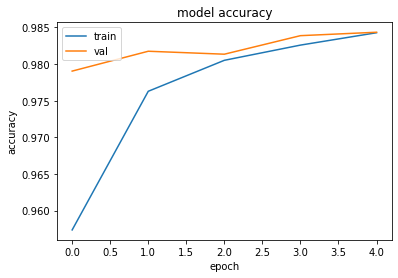

In [57]:
import matplotlib.pyplot as plt
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

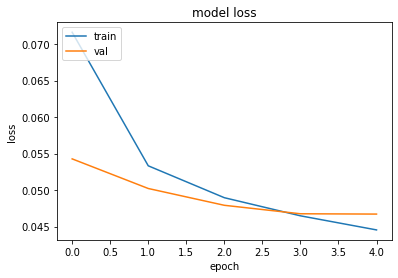

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

####  After 5 epochs of training we achieved a Validation AUC of 0.984. 